<a href="https://colab.research.google.com/github/erick1439/CAP4630-Wocjan/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


# **Problem 1:**

## Description:


Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
Choose the first feature x_1 uniformly at random in the interval [0, 1).
Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
The ith row of the array data consists of the features x_1 and x_2.
The ith entry of the vector labels is the class label c.
Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

Links to the numpy documentation of the functions that can be used to draw samples according to the uniform and normal distributions:

Normal distribution
Uniform distribution
You can learn more about the normal distribution on https://en.wikipedia.org/wiki/Normal_distribution. To gain some intuition, it would be helpful to plot the Gaussian function for different parameters mu and sigma in a seperate notebook (that you do not have to submit). Later in the semester, you will need to work with normal distribution to understand variational autoencoders.



## Implementation: 

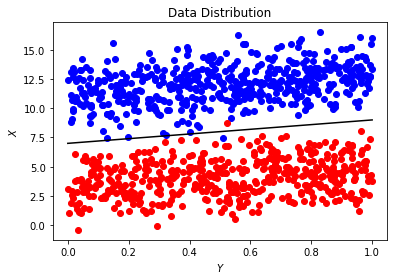

In [2]:
def get_random_data(w, b, mu, sigma, m):
  # Generates array with ones and zeros.
  labels = np.random.choice([0, 1], size=(m,1))
  
  # Generates uniformly random data.
  X_1 = np.random.uniform(0, 1, size=(m, 1))

  # Generates random data with mean distribution of mu, and sd of sigma.
  N = np.random.normal(mu, sigma, size=(m, 1))

  # Sets the second feature
  X_2 = w * X_1 + b + (-1)**labels * N

  # Concatenates the features X_1 & X_2 to produce the array with a shape of (m, 2).
  data = np.concatenate((X_1, X_2), axis=1)

  return data, labels

def split_data(data, labels):
  # Splits the data with a 80:20 ratio
  train_data = data[:(int)(m * 0.8)]
  test_data = data[(int)(m * 0.8):]
  train_labels = labels[:(int)(m * 0.8)]
  test_labels = labels[(int)(m * 0.8):]

  return train_data, test_data, train_labels, test_labels

def display_random_data (data, labels, w, b):
  # Display data points 
  pt = labels.flatten()
  temp1 = data[pt == 0,:]
  temp2 = data[pt == 1,:]
  plt.scatter(temp1[:,0], temp1[:,1], c='blue', label='X_1')
  plt.scatter(temp2[:,0], temp2[:,1], c='red', label='X_2')

  # Displays line that splits the data
  slope = np.linspace(0, 1)
  y = w * slope + b
  plt.plot(slope, y, 'black')

  # Labels the graph
  plt.title('Data Distribution')
  plt.xlabel('$Y$')
  plt.ylabel('$X$')


# Testing Data
w = 2
b = 7
mu = 4
sigma = 1.5
m = 1000

data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels, w, b)
train_data, test_data, train_labels, test_labels = split_data(data, labels)



# **Problem 2:**

## Description:

Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

How well does the trained model separate the red and blue dots? You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function get_weights. See https://keras.io/layers/about-keras-layers/.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer). This is not immediately obvious. It maybe helpful to take a look at the heatmap below.

The trained model realizes function f : R^2 -> R that takes two features as input and outputs a number in the interval [0, 1]. Use a heatmap to visualize this function.

## Implementation:

In [0]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Gathering data from problem 1 with sample data.
w = 2
b = 7
mu = 4
sigma = 1.5
m = 1000

data, labels = get_random_data(w, b, mu, sigma, m)
train_data, test_data, train_labels, test_labels = split_data(data, labels)

In [4]:
# HyperParameters
epochs = 50
batch_size = 40

# Creates the model
model = tf.keras.models.Sequential()

# Adds dense layer to the model
layer = tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2, ))
model.add(layer)

# Compiles the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Trains the model
model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels))

Epoch 1/50
20/20 [==============================] - 0s 10ms/step - loss: 3.6406 - accuracy: 0.4938 - val_loss: 2.9463 - val_accuracy: 0.4650
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 2.3627 - accuracy: 0.4313 - val_loss: 1.8738 - val_accuracy: 0.2900
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 1.4755 - accuracy: 0.1838 - val_loss: 1.1941 - val_accuracy: 0.0600
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 1.0122 - accuracy: 0.1887 - val_loss: 0.9248 - val_accuracy: 0.3750
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.4663 - val_loss: 0.8141 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7625 - accuracy: 0.4837 - val_loss: 0.7362 - val_accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4875 - val_loss: 0.6701 - val_accuracy: 0.5100
Epoch 8/50
20/20 [=

To get the trained model separating line we are using the all the weights produced by the trained model.

In [0]:
# Function in charge to display the trained model separating line.
def display_trained_model_line():
  W, b = layer.get_weights()
  slope = np.linspace(0, 1)
  Y = -((W[0] * slope + b) / W[1])
  plt.title('Trained model separating line')
  plt.plot(slope, Y, color='green')
  plt.show()


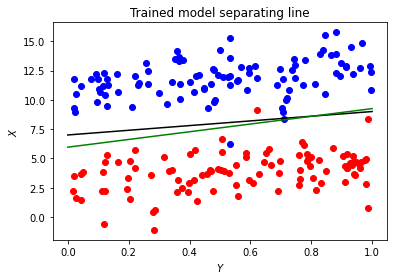

In [6]:
display_random_data(test_data, test_labels, w, b)
display_trained_model_line()

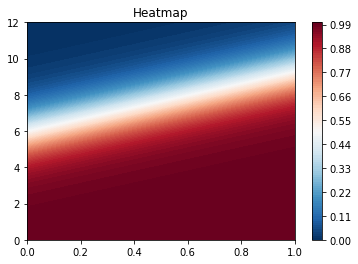

In [7]:
# Function in charge to display the heat map.
def heatmap():
  # Setting up the plane
  X, Y = np.meshgrid(np.linspace(0, 1), np.linspace(0, 12))

  # Acquires the weights
  W, b = layer.get_weights()
  
  # Apply weights and bias
  T = W[0] * X + W[1] * Y + b

  # Displays the heatmap plane
  plt.contourf(X, Y, 1.0 / (1.0 + np.exp(np.negative(T))), 100, cmap='RdBu_r')
  plt.title('Heatmap')
  plt.colorbar()
  plt.show()

heatmap()


# **Problem 3:**

## Description:

Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

## Implementation: 

In [0]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

# Gathering data from problem 1 with sample data.
w = 2
b = 7
mu = 4
sigma = 1.5
m = 1000

epochs = 20
learning_rate = 0.01

data, labels = get_random_data(w, b, mu, sigma, m)
train_data, test_data, train_labels, test_labels = split_data(data, labels)

In [0]:
#  Enforces that activation on the value z inside the interval [0, 1]
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Calculates the binary cross entropy loss
def binary_cross_entropy_loss(a, label):
    return (-label * np.log(a)) - ((1 - label) * np.log(1 - a))

# Computes the logistic regression
def logistic_regression_model(train_data, train_labels, test_data, test_labels, epochs, learing_rate):
    weights = np.random.random_sample((3, ))
    for epoch in np.arange(epochs):
        loss = 0
        accuracy = 0

        for i in np.arange(len(train_data)):
            z = np.concatenate(([1], train_data[i]))
            a = sigmoid(weights.T.dot(z))
            weights -= ((a - train_labels[i]) * z) * learning_rate

        for i in range(len(test_data)):
            z = np.concatenate(([1], test_data[i]))
            a = sigmoid(weights.T.dot(z))
            
            if a > 0.5:
              prediction = 1
            else:
              prediction = 0

            if prediction == test_labels[i]:
                accuracy += 1
            
            loss += binary_cross_entropy_loss(a, test_labels[i])

        loss, accuracy = (loss[0] / len(test_data), accuracy / len(test_data))
            
    return weights

weights = logistic_regression_model(train_data, train_labels, test_data, test_labels, epochs, learning_rate)


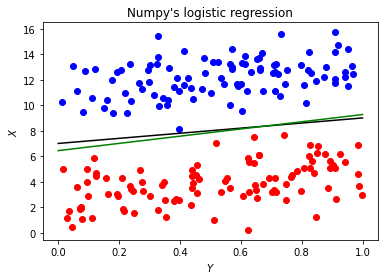

In [10]:
def display_data_problem_3():
  # Displays the data with original line separating the data
  display_random_data(test_data, test_labels, w, b)

  # Generates trained line
  slope = np.linspace(0, 1, 100)
  Y = -((weights[1] * slope + weights[0]) / weights[2])
  plt.title('Numpy\'s logistic regression')
  plt.plot(slope, Y, color='green')
  plt.show()

display_data_problem_3()


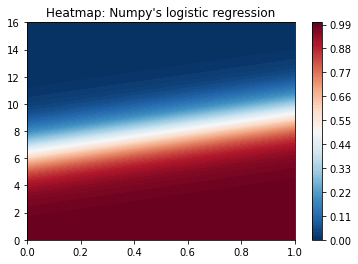

In [11]:
def heatmap_problem_3():
  # Setting up the plane
  X, Y = np.meshgrid(np.linspace(0, 1), np.linspace(0, 16))

  # Sigmoid activation with the computed weights
  val = sigmoid(weights[1] * X + weights[2] * Y + weights[0])

  # Displays the heatmap plane
  plt.contourf(X, Y, val, 100, cmap='RdBu_r')
  plt.title('Heatmap: Numpy\'s logistic regression')
  plt.colorbar()
  plt.show()

heatmap_problem_3()

# **Resources:** 

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-
https://github.com/schneider128k/machine_learning_course